In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
from pymongo import MongoClient
from config import mongo_key

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(mongo_key)

# Assign the database to a variable name
db = mongo['heart_attack_risk_db']

# Assign the collection to a variable
heart_attack_records = db['heart_attack_data']

# Retrieve data from the collection
data_from_mongo = list(heart_attack_records.find())

In [3]:
# Convert the collection to a Pandas DataFrame
heart_attack_df = pd.DataFrame(data_from_mongo)

# Display the number of rows in the DataFrame
print('Number of rows:', len(heart_attack_df))

# Display the DataFrame
heart_attack_df.head()

Number of rows: 8763


,_id,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,65cebe94cf813089ec40a416,BMW7812,67,Male,208,158/88,72,0,0,1,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,65cebe94cf813089ec40a417,CZE1114,21,Male,389,165/93,98,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,65cebe94cf813089ec40a418,BNI9906,21,Female,324,174/99,72,1,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,65cebe94cf813089ec40a419,JLN3497,84,Male,383,163/100,73,1,1,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,65cebe94cf813089ec40a41a,GFO8847,66,Male,318,91/88,93,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [16]:
# Split the 'Blood Pressure' column into systolic and diastolic readings
blood_pressure_split = heart_attack_df['Blood Pressure'].str.split('/', expand=True)

# Convert the systolic and diastolic readings to numeric type
systolic = pd.to_numeric(blood_pressure_split[0], errors='coerce')
diastolic = pd.to_numeric(blood_pressure_split[1], errors='coerce')

# Replace the original 'Blood Pressure' column with the systolic readings
heart_attack_df['Blood Pressure'] = systolic

# Optionally, you can create a new column for diastolic readings if needed
heart_attack_df['Diastolic Blood Pressure'] = diastolic


In [17]:
heart_attack_df.head()

,_id,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Diastolic Blood Pressure
0,65cebe94cf813089ec40a416,BMW7812,67,Male,208,158,72,0,0,1,...,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,88
1,65cebe94cf813089ec40a417,CZE1114,21,Male,389,165,98,1,1,1,...,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,93
2,65cebe94cf813089ec40a418,BNI9906,21,Female,324,174,72,1,0,0,...,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,99
3,65cebe94cf813089ec40a419,JLN3497,84,Male,383,163,73,1,1,1,...,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,100
4,65cebe94cf813089ec40a41a,GFO8847,66,Male,318,91,93,1,1,1,...,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,88


In [30]:
# Preprocess the data
# Select features and target
# X = heart_attack_df.drop(['Patient ID', 'Heart Attack Risk', 'Blood Pressure', '_id', 'Sex'], axis=1)
X = heart_attack_df[['Cholesterol', 'Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week']]
y = heart_attack_df['Heart Attack Risk']

In [31]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [33]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [34]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [36]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [37]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [38]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [39]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1390,49
Actual 1,719,33


Accuracy Score : 0.6494751255134642
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      1439
           1       0.40      0.04      0.08       752

    accuracy                           0.65      2191
   macro avg       0.53      0.50      0.43      2191
weighted avg       0.57      0.65      0.54      2191



In [40]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1551572149588452, 'BMI'),
 (0.1497233966797222, 'Triglycerides'),
 (0.1453354576929568, 'Cholesterol'),
 (0.13257541488449512, 'Blood Pressure'),
 (0.12908352434970474, 'Heart Rate'),
 (0.12192211344343959, 'Diastolic Blood Pressure'),
 (0.06987762115832245, 'Physical Activity Days Per Week'),
 (0.021649429658460267, 'Family History'),
 (0.02143948840051138, 'Obesity'),
 (0.020500796488005565, 'Diabetes'),
 (0.020119196912801215, 'Alcohol Consumption'),
 (0.012616345372735501, 'Smoking')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

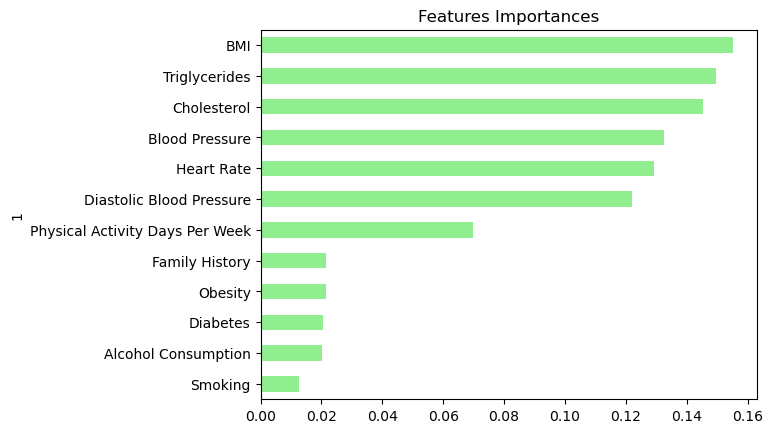

In [41]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)